## Multi Layer Perceptron ( MLP )  __________________________________

Importar as bibliotecas

In [54]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import normalize 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics._classification import classification_report
from sklearn.model_selection import GridSearchCV

### Carregar Base de Dados

In [55]:
data = pd.read_csv('Data\data.csv').dropna()
data.sample(10)

,Compacidade,Circularidade,Razão Eixos,Intencidade Média,Classe
130,27.709153,0.453510,0.269202,0.275665,3
150,17.090162,0.735298,0.622322,0.309765,4
94,21.473562,0.585202,0.353521,0.223421,2
32,17.299041,0.726420,0.524695,0.325720,0
106,21.726075,0.578400,0.338206,0.415189,2
169,17.211085,0.730132,0.751918,0.157885,5
121,28.764318,0.436874,0.262119,0.195880,3
75,21.424755,0.586535,0.367079,0.114361,2
151,16.844169,0.746037,0.635700,0.319806,4
68,17.364335,0.723689,0.598831,0.209456,1


In [56]:
data['Classe'].value_counts()


1    39
5    39
2    37
0    35
4    29
3    28
Name: Classe, dtype: int64

In [57]:
x = data.drop('Classe', axis=1)
y = data['Classe']
X_normalized = normalize(x, axis=0)

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.1)

sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)





In [58]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50), alpha= 0.0001,
                        learning_rate= 'constant',
                        max_iter = 150,activation = 'tanh',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)




c:\Users\bianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50),
              max_iter=150)

In [59]:
y_pred = mlp_clf.predict(testX_scaled)
print(y_pred)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print(classification_report(testY, y_pred))



[5 1 4 0 1 3 2 5 2 2 0 2 0 0 2 3 4 2 5 1 4]
Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         2
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         3

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.94        21
weighted avg       0.97      0.95      0.95        21



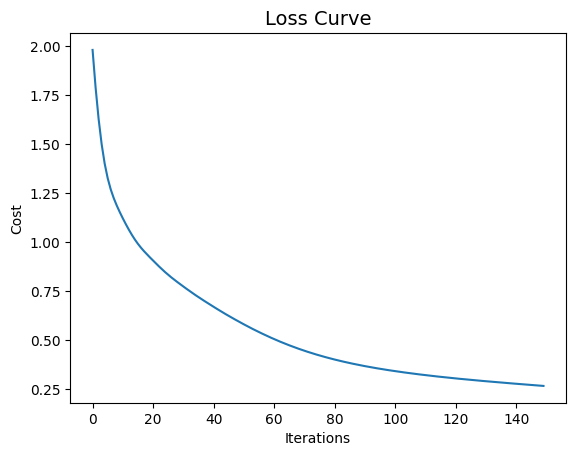

In [60]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [61]:
""" param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions))) """

" param_grid = {\n    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],\n    'max_iter': [50, 100, 150],\n    'activation': ['tanh', 'relu'],\n    'solver': ['sgd', 'adam'],\n    'alpha': [0.0001, 0.05],\n    'learning_rate': ['constant','adaptive'],\n}\n\ngrid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)\ngrid.fit(trainX_scaled, trainY)\n\nprint(grid.best_params_) \n\ngrid_predictions = grid.predict(testX_scaled) \n\nprint('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions))) "

In [62]:
# salvar modelo
import pickle
# salvar o modelo XGBoost (xgb_model) no arquivo sale_xgboost.pkl
with open('sale_xgboost.pkl', 'wb') as file:
    pickle.dump(mlp_clf, file)